# Controlled Gates

For all of the prior workshops, you've been exposed to single Qubit gates. They're neat 2x2 matrices that just work on single qubits. 

However, single qubits aren't enough to express all the possible computations we'd want to run on a quantum computer. We need gates that allow multiple qubits to interact with eachother. 

To do such a thing a class of quantum gates exist known as "Controlled" gates. These gates act on other qubits (a "target") based on the state of their input qubits ("control" qubits).

## Controlled NOT (CNOT/CX)

The CNOT/CX gate selectively applies the X gate to a qubit depending on the state of a particular input qubit.

If the input qubit is in the $\ket{1}$ state, then the X gate is applied. Otherwise, nothing happens. Furthermore, nothing happens to the input qubit, it is ONLY the target qubit that is affected. 

If we let the first qubit represent the Control, and the second qubit represent the Target (think $\ket{\text{control}} \otimes \ket{\text{target}}$, we obtain the following:

$$CX \ket{00} = \ket{00}$$
$$CX \ket{01} = \ket{01}$$
$$CX \ket{10} = \ket{11}$$
$$CX \ket{11} = \ket{10}$$

In all the $\ket{\text{control}}$ entries, the qubit state is presrved. However, in the last two entries we see that when $\ket{\text{control}} = \ket{1} $, the target qubit is flipped.

You can also think of the CX gate as a kind of reversible XOR gate (source: ["Tutorial: Implement Grover's search algorithm in Q#", Azure Quantum Documentation](https://docs.microsoft.com/en-us/azure/quantum/tutorial-qdk-grovers-search?tabs=tabid-visualstudio)). It is reversible in the sense that if you are given the output, you know the input as well versus the traditional XOR operation where two bits of input only give you a single ouptut. 

This can also be expressed in ket-bra decomposition as:
    
$$
CX = \ket{00}\bra{00} + \ket{01}\bra{01} + \ket{11}\bra{10} + \ket{10}\bra{11}
$$

Note that we map each input as a bra, and each output as a ket

In many quantum software frameworks, such as the one you'll be using in later workshops, you'll find that the CX gate is visually represented like the following:

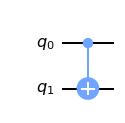

In [3]:
# IGNORE THIS CODE FOR NOW, YOU DON'T HAVE TO WORRY ABOUT IT!
# Just look at the shiny picture below

# visualize stuff
import matplotlib.pyplot as plt

# import Qiskit
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.cx(0,1)
circuit.draw(output="mpl")

Or equivalently in LaTeX documents (source: [Wikipedia, Quantum logic gate](https://en.wikipedia.org/wiki/Quantum_logic_gate)):

![](img/cx-latex.png)

The smaller circle is used to denote the control qubit while the larger circle with the plus in it is the target qubit

## Toffoli/CCX/CCNOT Gate

The Toffoli/CCX gate is like its brother the CX gate BUT
* It still targets one qubit, but takes TWO qubits as input
* Both the qubits must be in the $\ket{1}$ state to apply an X gate onto the target qubit

You can see the behavior of the gate from the following, letting the first qubit being $\ket{\text{control_1}}$, the second $\ket{\text{control_2}}$, and the third being $\ket{\text{target}}$ giving an input of:

$$\ket{\text{control_1}} \otimes \ket{\text{control_2}} \otimes \ket{\text{target}}$$

$$ CCX \ket{000} = \ket{000} $$
$$ CCX \ket{001} = \ket{001} $$
$$ CCX \ket{010} = \ket{010} $$
$$ CCX \ket{011} = \ket{011} $$
$$ CCX \ket{100} = \ket{100} $$
$$ CCX \ket{101} = \ket{101} $$
$$ CCX \ket{110} = \ket{111} $$
$$ CCX \ket{111} = \ket{110} $$

Note that it is only in the last two entries, where both the control qubits are $\ket{1}$, that anything changes

You can also think of the CCX gate as a kind of reversible AND gate (source: ["Tutorial: Implement Grover's search algorithm in Q#", Azure Quantum Documentation](https://docs.microsoft.com/en-us/azure/quantum/tutorial-qdk-grovers-search?tabs=tabid-visualstudio)).

In quantum software frameworks, the CCX gate is represented like so:

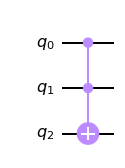

In [6]:
# IGNORE THIS CODE FOR NOW, YOU DON'T HAVE TO WORRY ABOUT IT!
# Just look at the shiny picture below

# visualize stuff
import matplotlib.pyplot as plt

# import Qiskit
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)
circuit.ccx(0,1,2)
circuit.draw(output="mpl")

Or equivalently in LaTeX documents (source: [Wikipedia, Quantum logic gate](https://en.wikipedia.org/wiki/Quantum_logic_gate)):

![](img/ccx-latex.png)

The two smaller dots represent the control qubits, while the larger circle with the "plus" symbol represents the target qubit. 

Note that this symbol pattern is merely an extension of what we saw with the CX gate.

## Do all Controlled Gates just apply the "X" gate onto a qubit?

Excellent observation, not at all! Just as you can have a CX gate you can also have a CH or a CY or a C (insert single qubit gate here)

They aren't covered here but you can get an idea of how useful they might be in the [IBM Qiskit Textbook, Section 2.4 - More Circuit Identities"](https://qiskit.org/textbook/ch-gates/more-circuit-identities.html)

## N-Control Qubit Gates

There are certain instances where we may want a Controlled gate that takes MORE than two qubits as its input. In fact, we may want N-qubit control where we get to specify the number of qubits required to be in the $\ket{1}$ state before something happens to the target qubit.

These N-Control Qubit gates look like this:

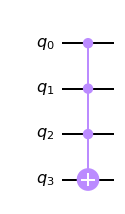

In [10]:
# IGNORE THIS CODE FOR NOW, YOU DON'T HAVE TO WORRY ABOUT IT!
# Just look at the shiny picture below

# visualize stuff
import matplotlib.pyplot as plt

# import Qiskit
from qiskit import QuantumCircuit

circuit = QuantumCircuit(4)
circuit.mcx([0,1,2],3)
circuit.draw(output="mpl")

In the particular instance, this is a Controlled-Controlled-Controlled-X (quite a mouthful) and will only affect the target qubit if ALL three inputs are $\ket{1}$